ЛАБОРАТОРНАЯ РАБОТА № 2 (ВАРИАНТ А) 
ВАРИАНТ ФУНКЦИИ - 23

In [256]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

ЗАДАНИЕ №1

In [257]:
def f(x):
    return np.sinh(x) * np.cos(3 * x)
xx = symbols('x')
func = sinh(xx) * cos(3*xx)
func


cos(3*x)*sinh(x)

In [258]:
a, b = -1, 2
N=10
err_bound = 0.01 * (b - a)
h_init = (b-a) / N
x_nod = np.arange(a, b, h_init)

ОЦЕНКА ВТОРОЙ РАЗНОСТНОЙ ПРОИЗВОДНОЙ

In [259]:
second_dif= (f(x_nod + h_init) - 2 * f(x_nod) + f(x_nod - h_init)) / h_init**2
max_second_diff = np.max(np.abs(second_dif))  # Максимальная вторая разностная производная
max_second_diff

17.203044069861207

In [260]:
# Вычислим шаг для первой правой разностной производной, учитывая погрешность
h_right = 2 * err_bound / max_second_diff
h_right

0.0034877548273631828

In [261]:
x_values_fine = np.arange(a, b, h_right)
right_diff_deriv = (f(x_values_fine + h_right) - f(x_values_fine)) / (h_right)

ЗАДАНИЕ №2

In [ ]:
#Третья разностная производная
third_dif = (f(x_nod + h_init) - 3 * f(x_nod) + 3 * f(x_nod - h_init) - f(x_nod - 2 * h_init)) / h_init**3
max_third_dif = np.max(np.abs(third_dif))
max_third_dif

37.83918583476903

In [263]:
# Граница ошибки и оптимальный шаг для центральной разностной производной
err_bound = 0.01 * (b - a)
h_center = np.sqrt(err_bound/max_third_dif) # Оптимальный шаг

# Расчет значений первой центральной разностной производной
x_values_fine = np.arange(a + h_center, b - h_center, h_center)  # Избегаем краевых значений
central_diff_deriv = (f(x_values_fine + h_center) - f(x_values_fine - h_center)) / (2 * h_center)

In [264]:
# Производная, полученная аналитическим путем
def real_dif(x:np.ndarray) -> np.ndarray:
    reall_dif = np.cosh(x) * np.cos(3*x) - 3 * np.sinh(x) * np.sin(3*x)
    return reall_dif

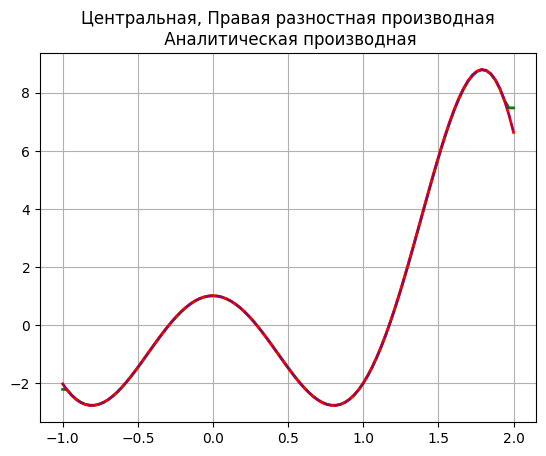

In [265]:
x_full = np.linspace(a, b, 100)
plt.plot(x_full, np.interp(x_full, np.arange(a + h_center, b - h_center, h_center), central_diff_deriv), 
         label='Центральная разностная производная', color='green', linewidth=2)
plt.plot(x_full, np.interp(x_full, np.arange(a, b, h_right), right_diff_deriv), 
         label='Правая разностная производная', color='red', linewidth=2 )
plt.plot(x_full, real_dif(x_full), color='blue', alpha=0.4 , linestyle='--') 
plt.title(f"Центральная, Правая разностная производная\n Аналитическая производная")
plt.grid(True)

ЗАДАНИЕ №3

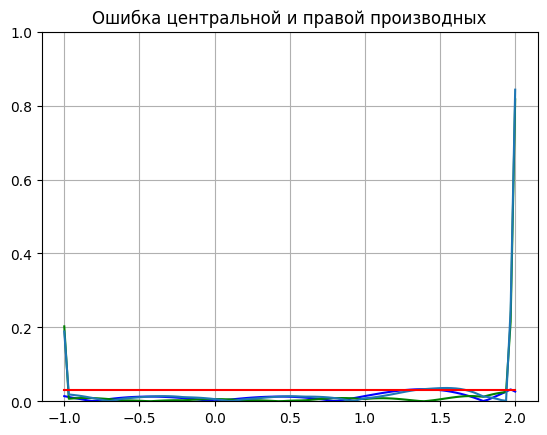

In [ ]:
# 3
x_full = np.linspace(a, b, 100)
plt.plot(x_full, abs(np.interp(x_full, np.arange(a, b, h_right), right_diff_deriv) - real_dif(np.linspace(a, b, 100))), color='blue')
plt.plot(x_full, abs(np.interp(x_full, np.arange(a + h_center, b - h_center, h_center), central_diff_deriv) - real_dif(np.linspace(a, b, 100))), color='green')
plt.plot(x_full, np.array([err_bound]*100), color='red')
plt.title(f"Ошибка центральной и правой производных")
plt.ylim(0,1)
plt.grid(True)

ВЫВОД
По графику можно понять,что центральная производная функции лучше приближает значение истинной производной функции на практически на все отрезке,за исключением краев отрезка,где ошибка очень большая.ПО итогу можно сказать, что при интерполяции производной лучше всего использовать всеми производными для лучшего результата.